In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
netflix_data = pd.read_csv("NetflixOriginals.csv", encoding='latin-1')
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [3]:
netflix_data.head(5)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
netflix_data.tail(5)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [5]:
netflix_data["Premiere"] = pd.to_datetime(netflix_data["Premiere"])
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


## Task 1
>>Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

In [7]:
order_of_bar = netflix_data.groupby('Genre', as_index=False)['Runtime'].mean().sort_values(by = "Runtime", ascending = False)["Genre"]
order_of_bar



56       Heist film/Thriller
24     Anthology/Dark comedy
114             Zombie/Heist
111                War drama
61          Horror anthology
               ...          
10     Aftershow / Interview
47             Drama / Short
70           Musical / Short
16         Animation / Short
21             Anime / Short
Name: Genre, Length: 115, dtype: object

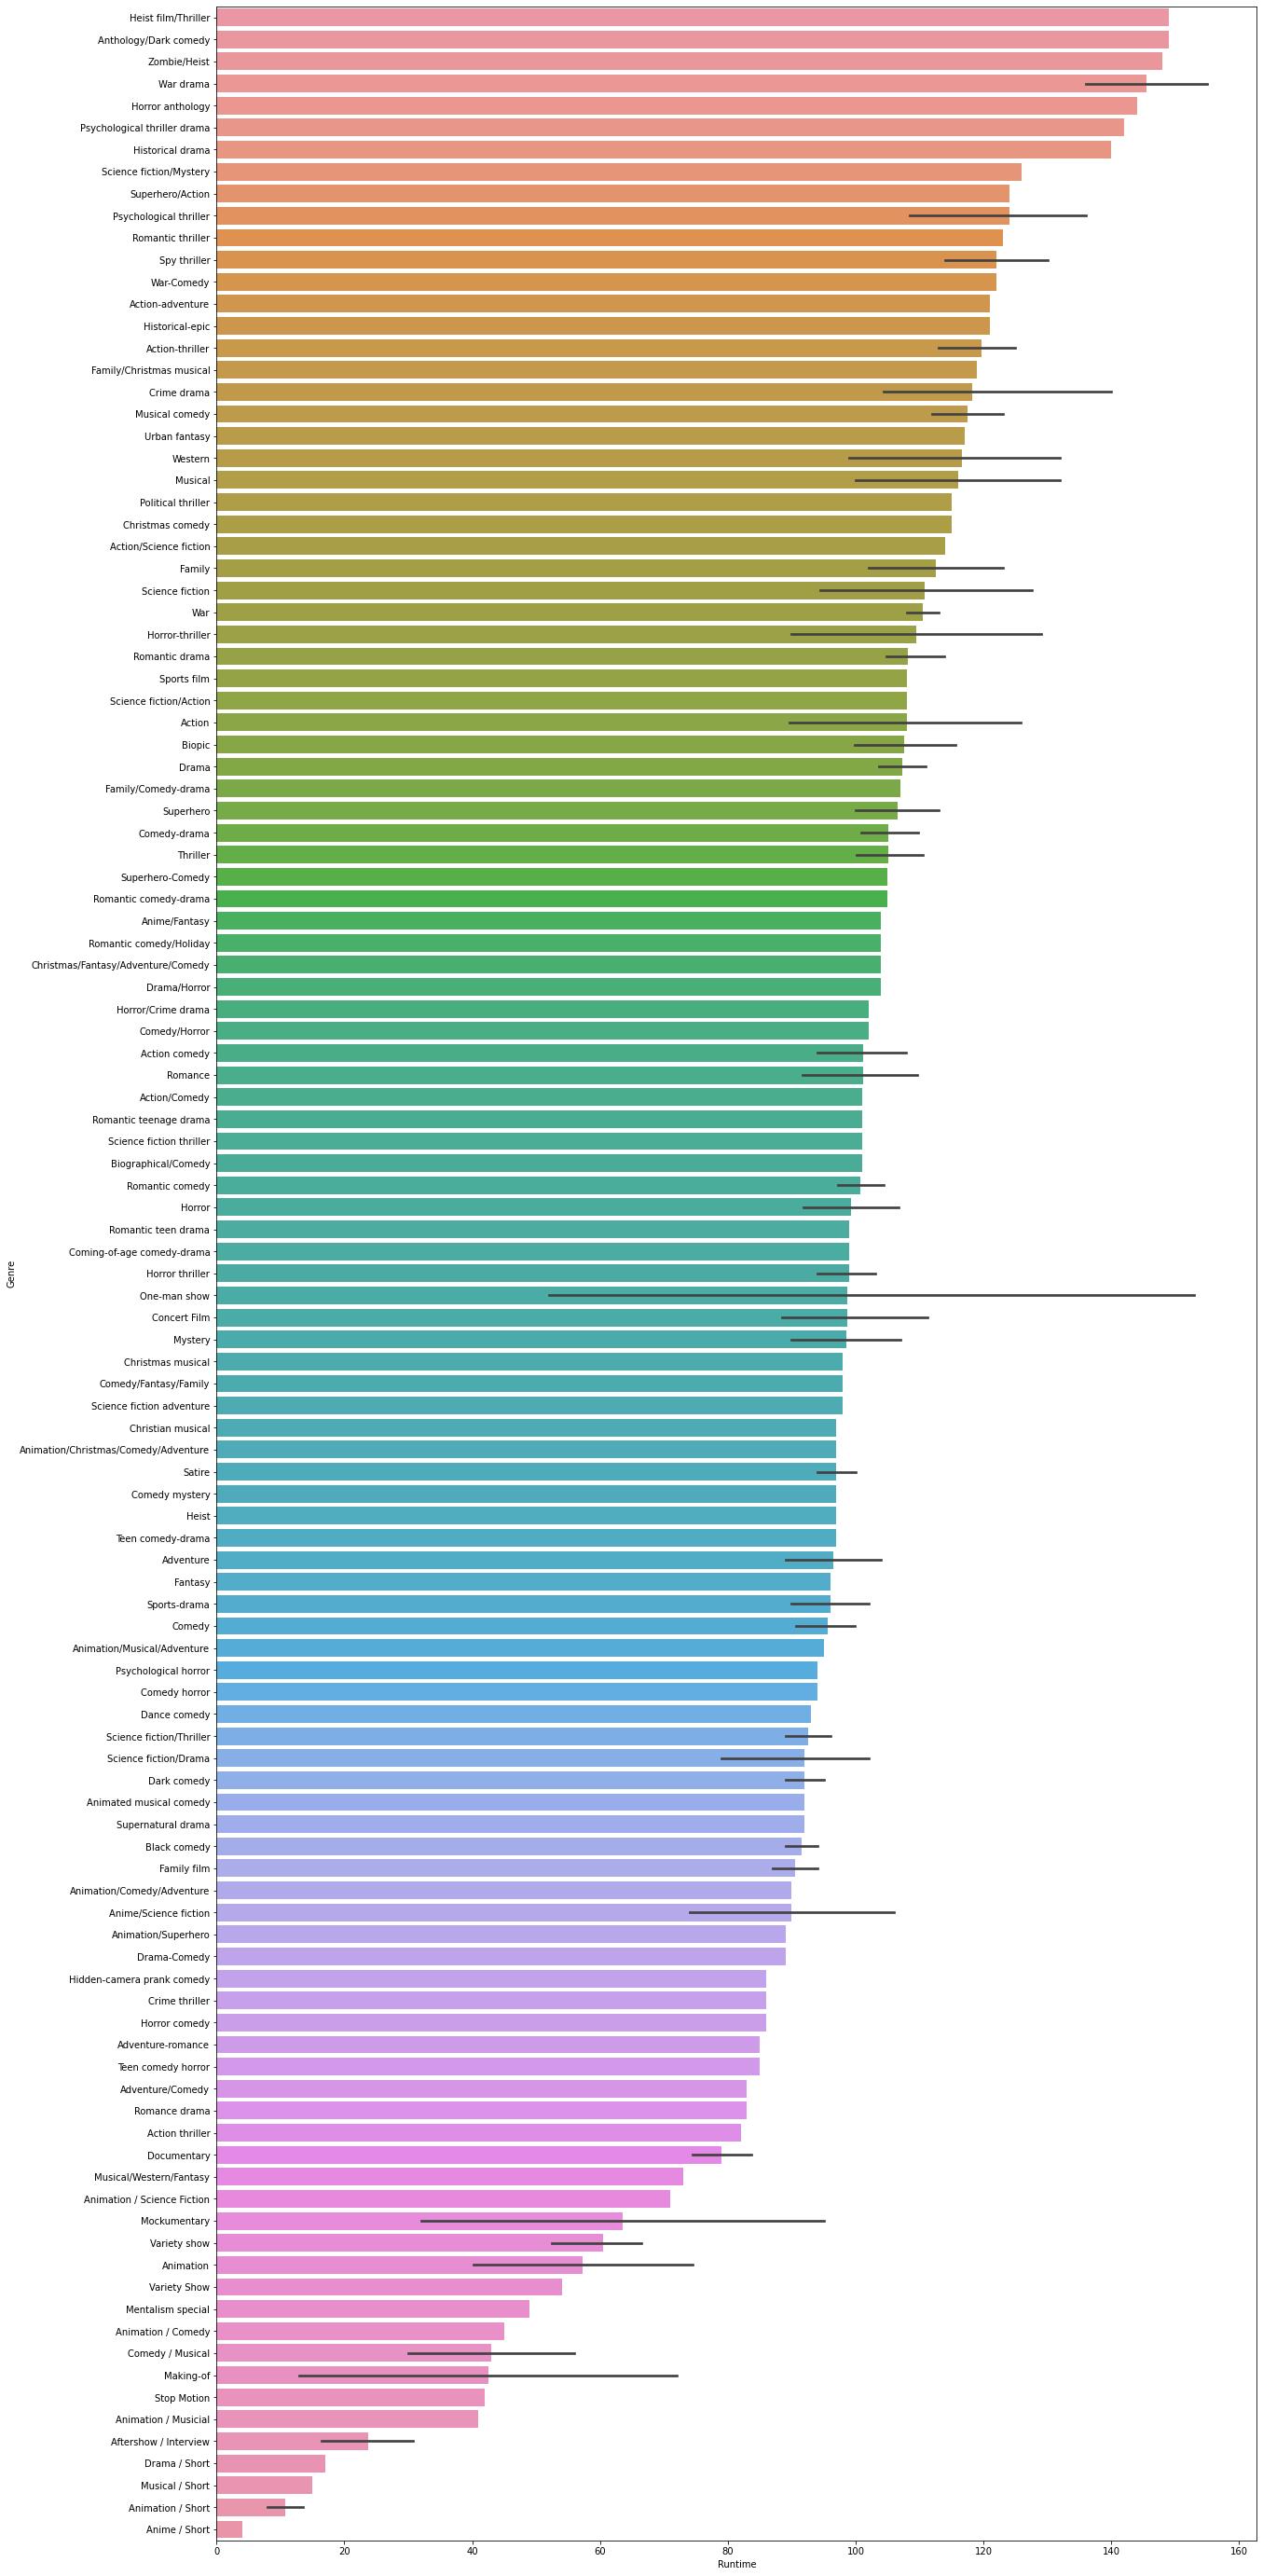

In [8]:
plt.figure(figsize=(20, 50))
language_runtime_graph = sns.barplot(x = "Runtime", y ="Genre" ,data = netflix_data, orient = "h",order=order_of_bar)

## Task 2
>>2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [9]:
documentary_films_between_2019_2020 = netflix_data[(netflix_data["Genre"] == "Documentary") & (netflix_data['Premiere'] >= '2019-01-01') & (netflix_data['Premiere'] <= '2020-07-31')]
documentary_films_between_2019_2020.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
36,We Are One,Documentary,2020-07-14,86,4.6,French


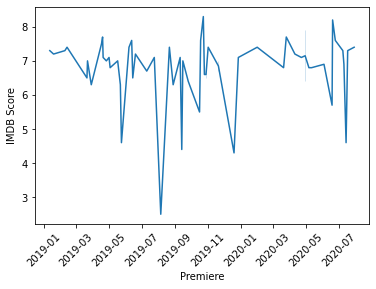

In [10]:
viz = sns.lineplot(x="Premiere", y="IMDB Score", data = documentary_films_between_2019_2020)
plt.xticks(rotation=45);

## Task 3
>>İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [11]:
#Show raw data
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [12]:
highest_imdb_film_eng = netflix_data[netflix_data["Language"] == "English"].sort_values(by = "IMDB Score", ascending = False)
highest_imdb_film_eng_genre = highest_imdb_film_eng.head(1)["Genre"].values[0]
print(highest_imdb_film_eng_genre)

Documentary


## Task 4
>>'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [13]:
#Show raw data
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [14]:
#Show raw info
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


In [15]:
hindi_runtime_mean = netflix_data[netflix_data["Language"] == "Hindi"]["Runtime"].mean()
print(hindi_runtime_mean)

115.78787878787878


## Task 5

>>'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir?

In [16]:
#Show raw data
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [17]:
#number of unique categories 
len(netflix_data["Genre"].value_counts())

115

In [18]:
#Show unique genres
for genre in netflix_data["Genre"].unique():
    print(genre)

Documentary
Thriller
Science fiction/Drama
Horror thriller
Mystery
Action
Comedy
Heist film/Thriller
Musical/Western/Fantasy
Drama
Romantic comedy
Action comedy
Horror anthology
Political thriller
Superhero-Comedy
Horror
Romance drama
Anime / Short
Superhero
Heist
Western
Animation/Superhero
Family film
Action-thriller
Teen comedy-drama
Romantic drama
Animation
Aftershow / Interview
Christmas musical
Science fiction adventure
Science fiction
Variety show
Comedy-drama
Comedy/Fantasy/Family
Supernatural drama
Action/Comedy
Action/Science fiction
Romantic teenage drama
Comedy / Musical
Musical
Science fiction/Mystery
Crime drama
Psychological thriller drama
Adventure/Comedy
Black comedy
Romance
Horror comedy
Christian musical
Romantic teen drama
Family
Dark comedy
Comedy horror
Psychological thriller
Biopic
Science fiction/Thriller
Mockumentary
Satire
One-man show
Romantic comedy-drama
Comedy/Horror
Fantasy
Sports-drama
Zombie/Heist
Psychological horror
Sports film
Comedy mystery
Romantic

In [19]:
#Show number of films based on category
number_of_films_based_on_genre = netflix_data["Genre"].value_counts()
number_of_films_based_on_genre

Documentary            159
Drama                   77
Comedy                  49
Romantic comedy         39
Thriller                33
                      ... 
Fantasy                  1
Political thriller       1
Animation/Superhero      1
Heist                    1
Crime thriller           1
Name: Genre, Length: 115, dtype: int64

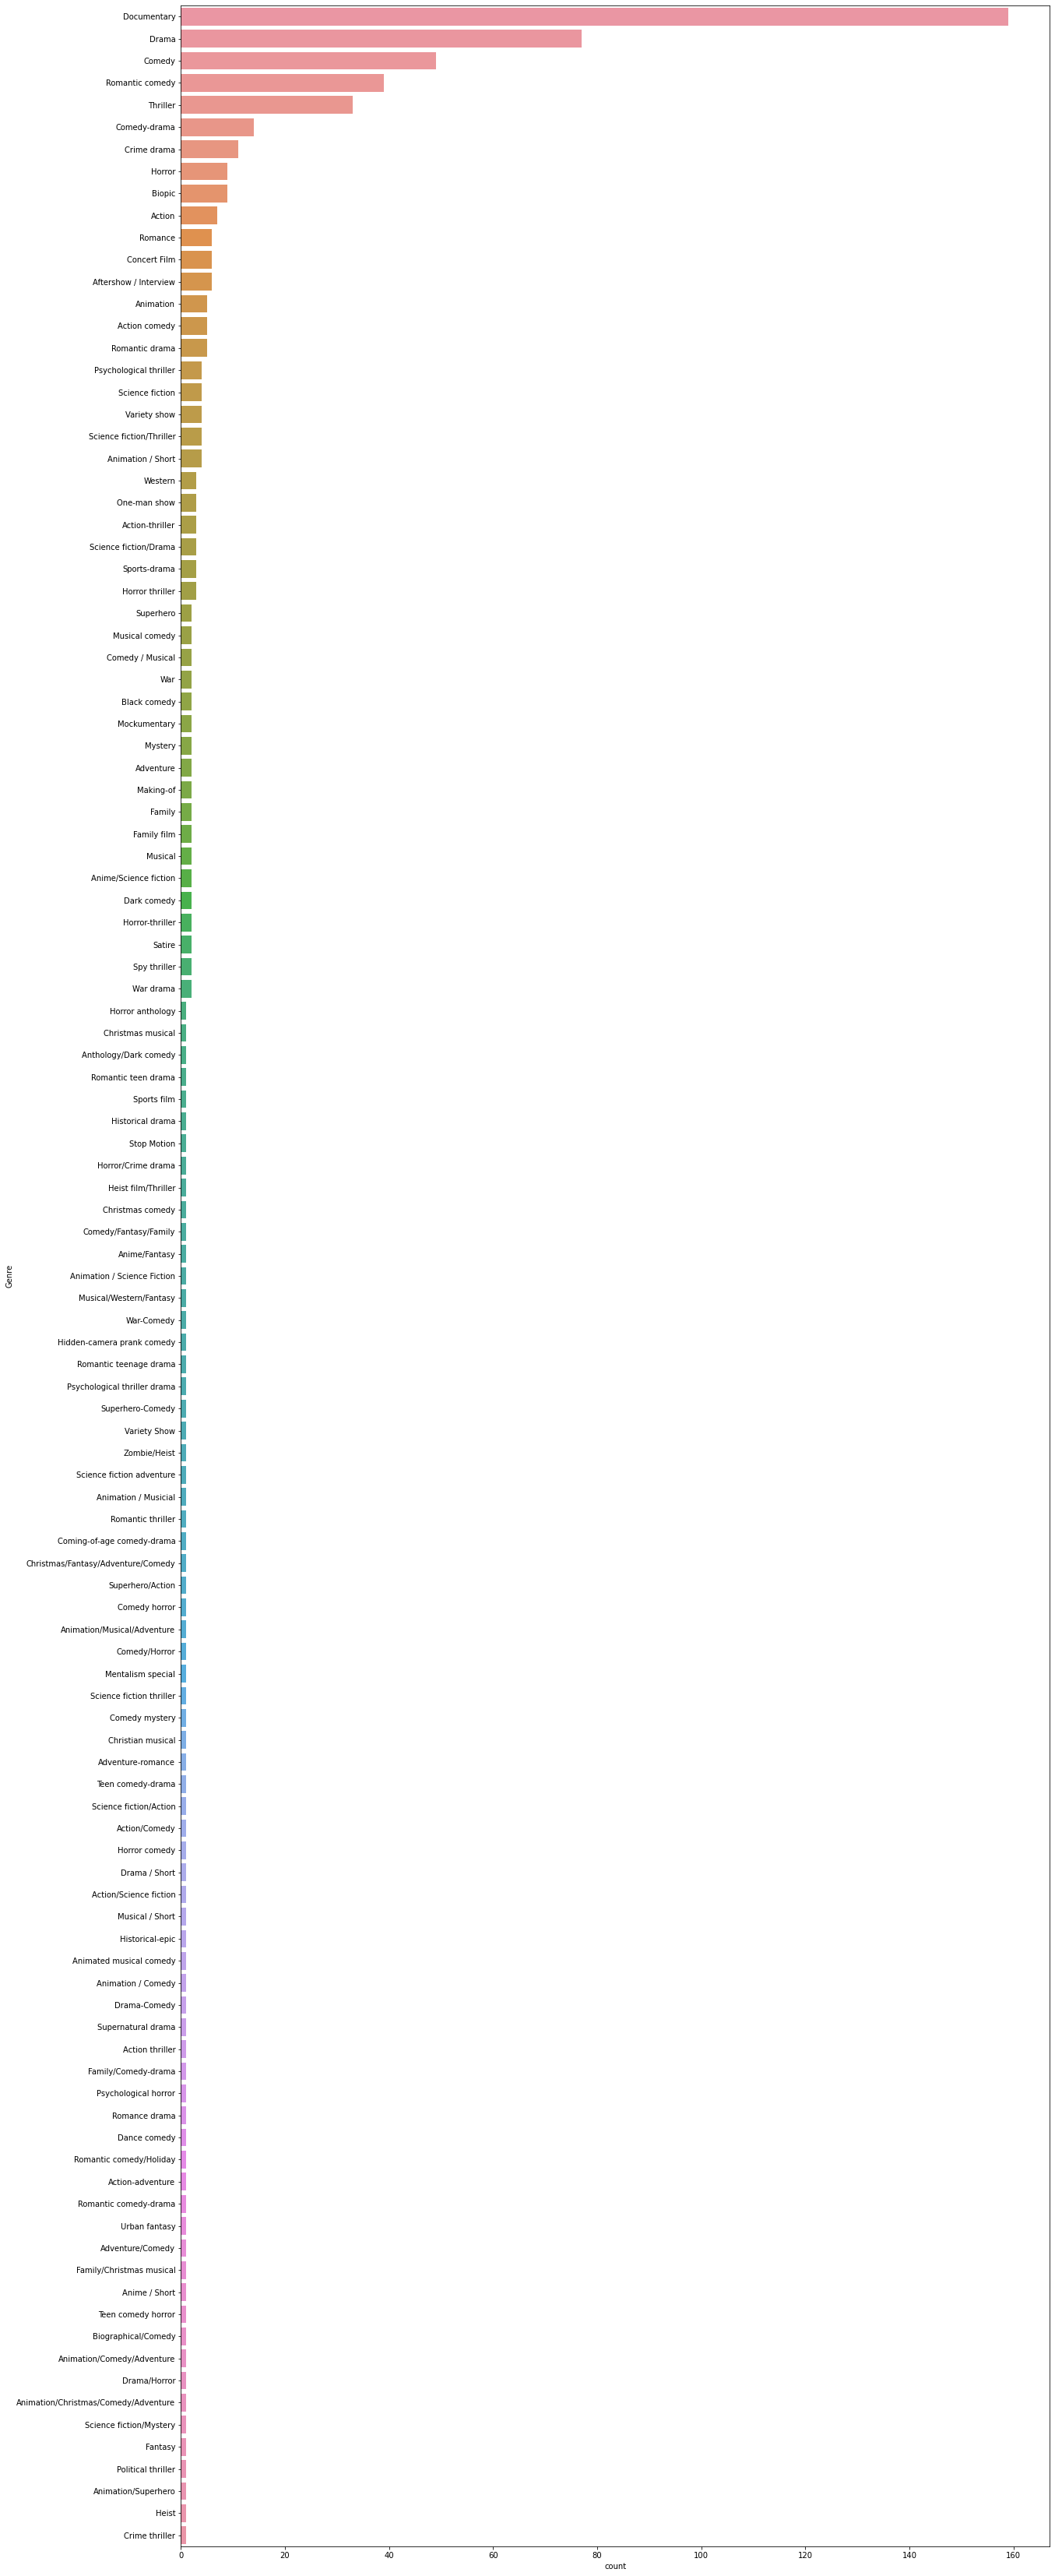

In [20]:
plt.figure(figsize=(20, 60))
ax = sns.countplot(y="Genre", data=netflix_data,order = netflix_data['Genre'].value_counts().index)


## Task 6

>>Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [21]:
#Show raw data
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [22]:
number_of_films_based_on_language = netflix_data["Language"].value_counts().head(3)
for lang,num in number_of_films_based_on_language.items():
    print(f"Language:{lang}, number of films:{num}")

Language:English, number of films:401
Language:Hindi, number of films:33
Language:Spanish, number of films:31


## Task 7

>>IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [23]:
#Show raw data
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [24]:
highest_10_imdb = netflix_data.sort_values(by = "IMDB Score", ascending = False).head(10)
display(highest_10_imdb[["Title","IMDB Score"]])

,Title,IMDB Score
583,David Attenborough: A Life on Our Planet,9.0
582,Emicida: AmarElo - It's All For Yesterday,8.6
581,Springsteen on Broadway,8.5
580,Winter on Fire: Ukraine's Fight for Freedom,8.4
579,Taylor Swift: Reputation Stadium Tour,8.4
578,Ben Platt: Live from Radio City Music Hall,8.4
577,Dancing with the Birds,8.3
576,Cuba and the Cameraman,8.3
573,Klaus,8.2
571,13th,8.2


## Task 8

>>IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

In [25]:
#Show raw data
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [26]:
correlation_coefficient = netflix_data['Runtime'].corr(netflix_data['IMDB Score'])
correlation_coefficient = '{:.2f}'.format(correlation_coefficient)

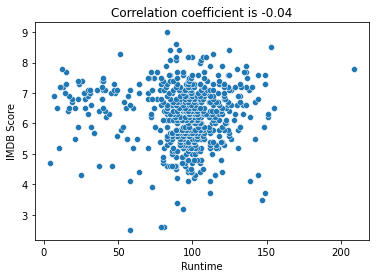

In [27]:
sns.scatterplot(data=netflix_data, x="Runtime", y="IMDB Score").set(title='Correlation coefficient is '+str(correlation_coefficient));

## Task 9

>>IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [28]:
#Show raw data
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [29]:
highest_imdb_10_genre = netflix_data.groupby('Genre', as_index=False)['IMDB Score'].mean().sort_values(by = "IMDB Score", ascending = False).head(10)

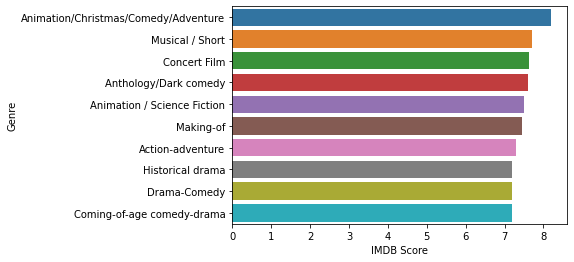

In [30]:
highest_imdb_10_genre_graph = sns.barplot(x = "IMDB Score", y ="Genre" ,data = highest_imdb_10_genre, orient = "h")

## Task 10

>>'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [31]:
#Show raw data
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [32]:
highest_imdb_10_runtime = netflix_data.sort_values(by = "Runtime", ascending = False).head(10)
highest_imdb_10_runtime

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,2019-11-27,209,7.8,English
328,Da 5 Bloods,War drama,2020-06-12,155,6.5,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
247,Citation,Drama,2020-11-06,151,6.2,English
284,The Forest of Love,Drama,2019-10-11,151,6.3,Japanese
509,Raat Akeli Hai,Thriller,2020-07-31,149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
543,Ludo,Anthology/Dark comedy,2020-11-12,149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,2021-05-21,148,5.9,English
5,Drive,Action,2019-11-01,147,3.5,Hindi


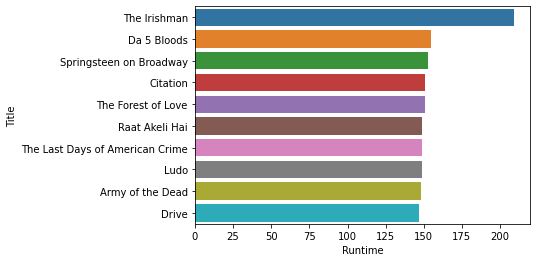

In [33]:
highest_imdb_10_runtime_graph = sns.barplot(x = "Runtime", y ="Title" ,data = highest_imdb_10_runtime)

## Task 11

>>Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [34]:
#Show raw data
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [35]:
netflix_films_by_year = netflix_data
netflix_films_by_year["Year"] = netflix_films_by_year["Premiere"].dt.year
netflix_films_by_year

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020


In [36]:
the_most_film_year = netflix_films_by_year["Year"].value_counts().head(1)
the_most_film_year.keys()[0]

2020

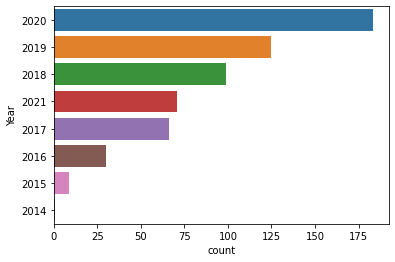

In [37]:
ax = sns.countplot(y="Year", data=netflix_films_by_year,order = netflix_films_by_year['Year'].value_counts().index)

## Task 12

>>Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [38]:
#Show raw data
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020


In [39]:
the_least_imdb_score_films_lang = netflix_data.groupby('Language', as_index=False)['IMDB Score'].mean().sort_values(by = "IMDB Score", ascending = True).head(10)
the_least_imdb_score_films_lang

,Language,IMDB Score
24,Malay,4.200000
6,English/Japanese,4.400000
26,Norwegian,5.100000
14,Filipino,5.100000
27,Polish,5.166667
35,Thai,5.450000
33,Swedish,5.500000
20,Italian,5.542857
30,Spanish/Basque,5.600000
17,German,5.640000


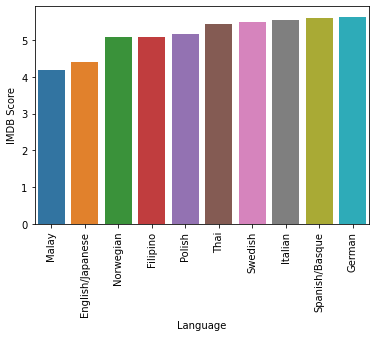

In [40]:
the_least_imdb_score_films_lang_graph = sns.barplot(x = "Language", y ="IMDB Score" ,data = the_least_imdb_score_films_lang)
plt.xticks(rotation=90);

## Task 13

>>Hangi yılın toplam "runtime" süresi en fazladır?

In [41]:
#Show raw data
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020


In [42]:
netflix_films_by_year = netflix_data
netflix_films_by_year["Year"] = netflix_films_by_year["Premiere"].dt.year
netflix_films_by_year

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020


In [43]:
the_most_runtime_year = netflix_films_by_year.groupby('Year', as_index=False)['Runtime'].sum().sort_values(by = "Runtime", ascending = False).head(10)
the_most_runtime_year.head(1)

,Year,Runtime
6,2020,17384


## Task 14

>>Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [44]:
#Show raw data
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020


In [45]:
the_most_genre_in_lang=pd.pivot_table(netflix_data, values='Title', index=['Language',"Genre"],
                          aggfunc='count').reset_index()
the_most_genre_in_lang=the_most_genre_in_lang.rename(columns = {'Title':'Number of films'})
the_most_genre_in_lang = the_most_genre_in_lang.sort_values(by = "Number of films", ascending = False)
the_most_genre_in_lang

,Language,Genre,Number of films
44,English,Documentary,120
45,English,Drama,35
32,English,Comedy,30
76,English,Romantic comedy,27
96,English,Thriller,14
...,...,...,...
81,English,Satire,1
83,English,Science fiction adventure,1
84,English,Science fiction/Action,1
86,English,Science fiction/Mystery,1


In [46]:
the_most_genre_in_lang.groupby('Language').first().reset_index()
#if u would like to show only category you can use the code below
#the_most_genre_in_lang.groupby('Language').first()["Genre"]

,Language,Genre,Number of films
0,Bengali,Documentary,1
1,Dutch,Fantasy,1
2,English,Documentary,120
3,English/Akan,War drama,1
4,English/Arabic,Documentary,1
5,English/Hindi,Documentary,2
6,English/Japanese,Crime drama,1
7,English/Korean,Action-adventure,1
8,English/Mandarin,Documentary,2
9,English/Russian,Documentary,1


## Task 15

>>Veri setinde outlier veri var mıdır? Açıklayınız.

In [47]:
#Show raw data
netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020


In [48]:
outlier_analysis_data = netflix_data.drop(columns=(["Title", "Language", "Year","Premiere"]))
outlier_analysis_data

,Genre,Runtime,IMDB Score
0,Documentary,58,2.5
1,Thriller,81,2.6
2,Science fiction/Drama,79,2.6
3,Horror thriller,94,3.2
4,Mystery,90,3.4
...,...,...,...
579,Concert Film,125,8.4
580,Documentary,91,8.4
581,One-man show,153,8.5
582,Documentary,89,8.6


<ipython-input-49-34c385563018>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


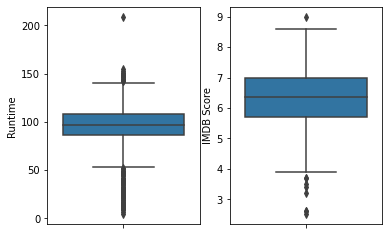

In [49]:
fig, ax =plt.subplots(1,2)
sns.boxplot(y = outlier_analysis_data["Runtime"],ax = ax[0]);
sns.boxplot(y = outlier_analysis_data["IMDB Score"],ax = ax[1]);
fig.show()


In [50]:
#Runtime outlier detection parameters
Q1 = outlier_analysis_data["Runtime"].quantile(0.25)
Q3 = outlier_analysis_data["Runtime"].quantile(0.75)
IQR = Q3-Q1
IQR

22.0

In [51]:
#Runtime outlier detection limits
low_limit = Q1- 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(low_limit,upper_limit)

53.0 141.0


In [52]:
#Detecting runtime outliers
outlier_analysis_data[(outlier_analysis_data["Runtime"] < low_limit) | (outlier_analysis_data["Runtime"]>upper_limit)]

,Genre,Runtime,IMDB Score
5,Action,147,3.5
7,Heist film/Thriller,149,3.7
15,Documentary,25,4.3
16,Horror anthology,144,4.3
30,Documentary,37,4.6
...,...,...,...
552,Musical / Short,15,7.7
560,Animation / Short,12,7.8
561,Crime drama,209,7.8
577,Documentary,51,8.3


In [53]:
#imdb score outlier detection parameters
Q1_imdb = outlier_analysis_data["IMDB Score"].quantile(0.25)
Q3_imdb = outlier_analysis_data["IMDB Score"].quantile(0.75)
IQR_imdb = Q3_imdb-Q1_imdb
IQR_imdb

1.2999999999999998

In [54]:
#imdb score outlier detection limits
low_limit_imdb = Q1_imdb- 1.5*IQR_imdb
upper_limit_imdb = Q3_imdb + 1.5*IQR_imdb
print(low_limit_imdb,upper_limit_imdb)

3.7500000000000004 8.95


In [55]:
#Detecting imdb score outliers
outlier_analysis_data[(outlier_analysis_data["IMDB Score"] < low_limit_imdb) | (outlier_analysis_data["IMDB Score"]>upper_limit_imdb)]

,Genre,Runtime,IMDB Score
0,Documentary,58,2.5
1,Thriller,81,2.6
2,Science fiction/Drama,79,2.6
3,Horror thriller,94,3.2
4,Mystery,90,3.4
5,Action,147,3.5
6,Comedy,112,3.7
7,Heist film/Thriller,149,3.7
583,Documentary,83,9.0
